## 📌 Tujuan Proyek
Proyek ini bertujuan untuk membangun model regresi guna memprediksi harga jual mobil berdasarkan berbagai fitur seperti jarak tempuh (km driven), jenis bahan bakar, merek mobil, dan lainnya. Model ini dapat membantu konsumen atau dealer mobil dalam menentukan harga pasar yang wajar.

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Dataset

In [2]:
# Load dataset
url = 'https://raw.githubusercontent.com/go0se05/predictive-analytics/refs/heads/main/Cars%20dataset.csv'
cars = pd.read_csv(url)
cars.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


# Penjelasan Variabel Dataset

Berikut adalah penjelasan mengenai variabel-variabel yang terdapat pada dataset mobil:

1. **Brand Mobil**  
  # Daftar Selama Merek Mobil dalam Dataset

Berikut adalah semua merek mobil yang terdapat dalam dataset:

- **Ambassador**
- **Audi**
- **BMW**
- **Chevrolet**
- **Daewoo**
- **Datsun**
- **Fiat**
- **Force**
- **Ford**
- **Honda**
- **Hyundai**
- **Isuzu**
- **Kia**
- **Mahindra**
- **Maruti**
- **Mercedes-Benz**
- **Mitsubishi**
- **Nissan**
- **Opel**
- **Peugeot**
- **Renault**
- **Skoda**
- **Tata**
- **Toyota**
- **Volkswagen**
- **Volvo**


2. **Harga**  
   Harga jual kendaraan dalam satuan mata uang (contoh: Rupiah atau USD).  

3. **Jarak Tempuh**  
   Total kilometer yang telah ditempuh oleh kendaraan sejak pertama kali digunakan.

4. **Tipe Bahan Bakar**  
   Jenis bahan bakar yang digunakan kendaraan:  
   - Bensin  
   - Solar  
   - Listrik (untuk kendaraan elektrik)  
   - Hybrid
     
5. **Owner**
   Kepemilikan mobil terdapat 3 kategori
   - First Owner 
   - Second Owner
   - Third Owner

In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   brand          8128 non-null   object
 1   km_driven      8128 non-null   int64 
 2   fuel           8128 non-null   object
 3   owner          8128 non-null   object
 4   selling_price  8128 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 317.6+ KB


### Analisis Informasi 

1. **Struktur Data**
   - Dataset berbentuk DataFrame pandas dengan **8,128 entri/baris** (index 0 sampai 8127)
   - Terdapat **5 kolom/fitur** dalam dataset ini

2. **Daftar Kolom dan Tipe Data**:

   a. `brand` (object/string)
   - Menunjukkan merek atau pabrikan kendaraan
   - Contoh: "Toyota", "Honda", "Suzuki", dll
   - **Tidak ada nilai kosong** (8128 non-null)

   b. `km_driven` (integer)
   - Menunjukkan total jarak tempuh kendaraan dalam kilometer
   - Data berupa angka bulat (contoh: 50000, 120000, dll)
   - **Tidak ada nilai kosong**

   c. `fuel` (object/string)
   - Menunjukkan jenis bahan bakar kendaraan
   - Kemungkinan nilai: "Petrol" (bensin), "Diesel", "CNG", "Electric", dll
   - **Tidak ada nilai kosong**

   d. `owner` (object/string)
   - Menunjukkan riwayat kepemilikan kendaraan
   - Kemungkinan nilai: "First Owner", "Second Owner", "Third Owner", dll
   - **Tidak ada nilai kosong**

   e. `selling_price` (integer)
   - Menunjukkan harga jual kendaraan (dalam satuan mata uang)
   - Merupakan variabel target untuk prediksi harga
   - **Tidak ada nilai kosong**

3. **Observasi Penting**:
   - Dataset ini **sangat bersih** karena tidak ada nilai null/missing value di kolom manapun
   - Terdapat 2 kolom numerik (`km_driven`, `selling_price`) dan 3 kolom kategorikal (`brand`, `fuel`, `owner`)
   - Ukuran dataset yang cukup besar (8128 sampel) baik untuk analisis statistik dan machine learning

In [4]:
cars.describe()

,km_driven,selling_price
count,8.128000e+03,8.128000e+03
mean,6.981951e+04,6.382718e+05
std,5.655055e+04,8.062534e+05
min,1.000000e+00,2.999900e+04
25%,3.500000e+04,2.549990e+05
50%,6.000000e+04,4.500000e+05
75%,9.800000e+04,6.750000e+05
max,2.360457e+06,1.000000e+07


Daftar semua merek mobil:
 ['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Fiat' 'Datsun' 'Mitsubishi' 'Volkswagen' 'Nissan'
 'BMW' 'Daewoo' 'Kia' 'Audi' 'Mercedes-Benz' 'Force' 'Volvo' 'Ambassador'
 'Opel' 'Peugeot' 'Isuzu']


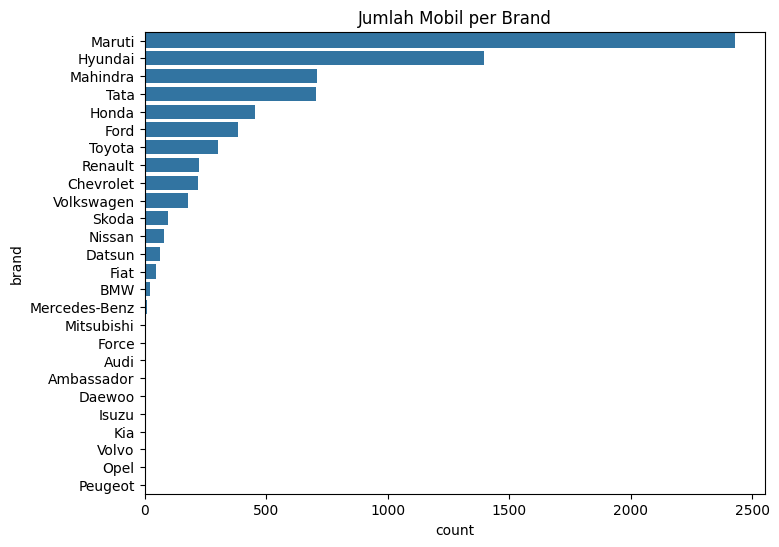

In [34]:
unique_brands = cars['brand'].unique()
print("Daftar semua merek mobil:\n", unique_brands)

plt.figure(figsize=(8,6))
sns.countplot(y='brand', data=cars, order=cars['brand'].value_counts().index)
plt.title("Jumlah Mobil per Brand")
plt.show()

## Handling Missing Values dan Outlier

In [5]:
# Cek missing values
print(cars.isnull().sum())
print()

brand            0
km_driven        0
fuel             0
owner            0
selling_price    0
dtype: int64



In [6]:
# Drop baris dengan nilai kosong (jika ada)
cars.dropna(inplace=True)

In [7]:
# Pisahkan fitur numerik dan kategorikal
num_cols = cars.select_dtypes(include='number').columns.tolist()
cat_cols = cars.select_dtypes(include='object').columns.tolist()

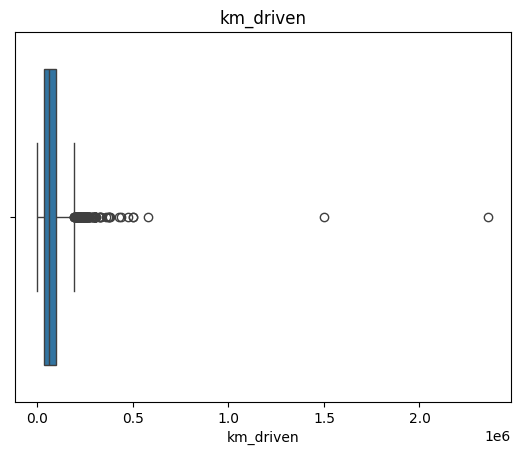

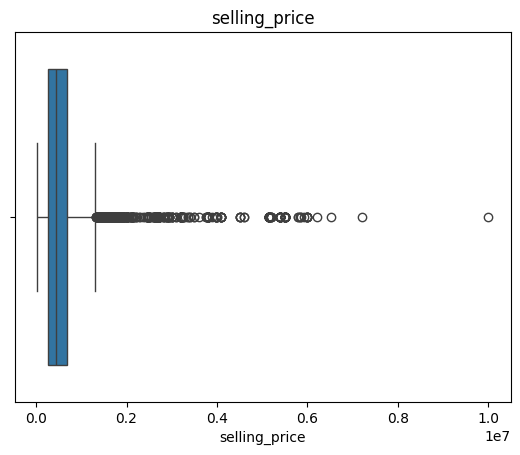

In [8]:
# Cek outlier secara visual
for col in num_cols:
    sns.boxplot(x=cars[col])
    plt.title(col)
    plt.show()

In [9]:
# Tangani outlier dengan IQR
Q1 = cars[num_cols].quantile(0.25)
Q3 = cars[num_cols].quantile(0.75)
IQR = Q3 - Q1
filter_outliers = ~((cars[num_cols] < (Q1 - 1.5 * IQR)) | (cars[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
cars = cars[filter_outliers]

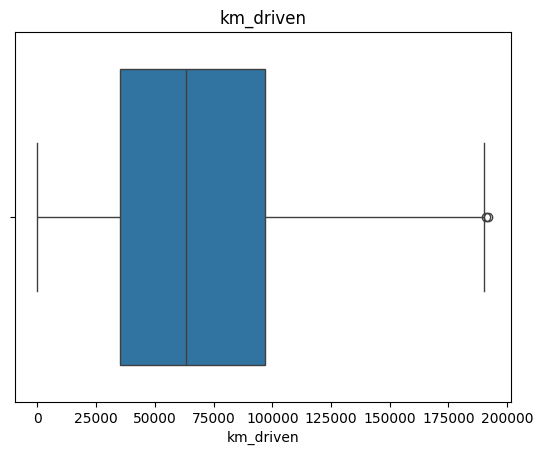

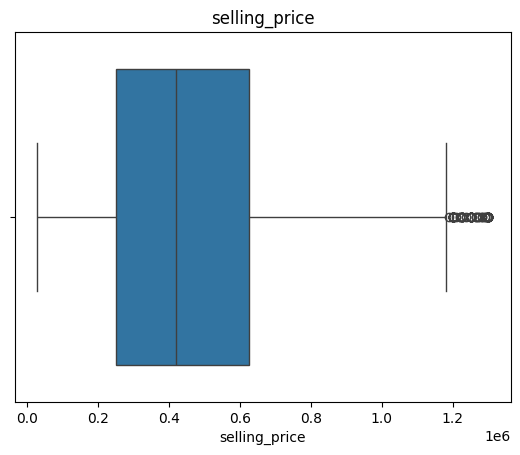

In [10]:
# Cek outlier secara visual
for col in num_cols:
    sns.boxplot(x=cars[col])
    plt.title(col)
    plt.show()

Outlier dapat mempengaruhi model regresi secara signifikan. Oleh karena itu dilakukan langkah pembersihan data yang mencakup:

- Menghapus nilai kosong (jika ada) agar tidak mengganggu proses analisis dan modeling.
- Menangani outlier menggunakan metode IQR untuk fitur numerik agar model tidak bias terhadap nilai ekstrem.
- Visualisasi boxplot digunakan untuk mendeteksi outlier pada kolom numerik.

In [11]:
# One-hot encoding untuk fitur kategorikal
cars_encoded = pd.get_dummies(cars, columns=cat_cols, drop_first=True)

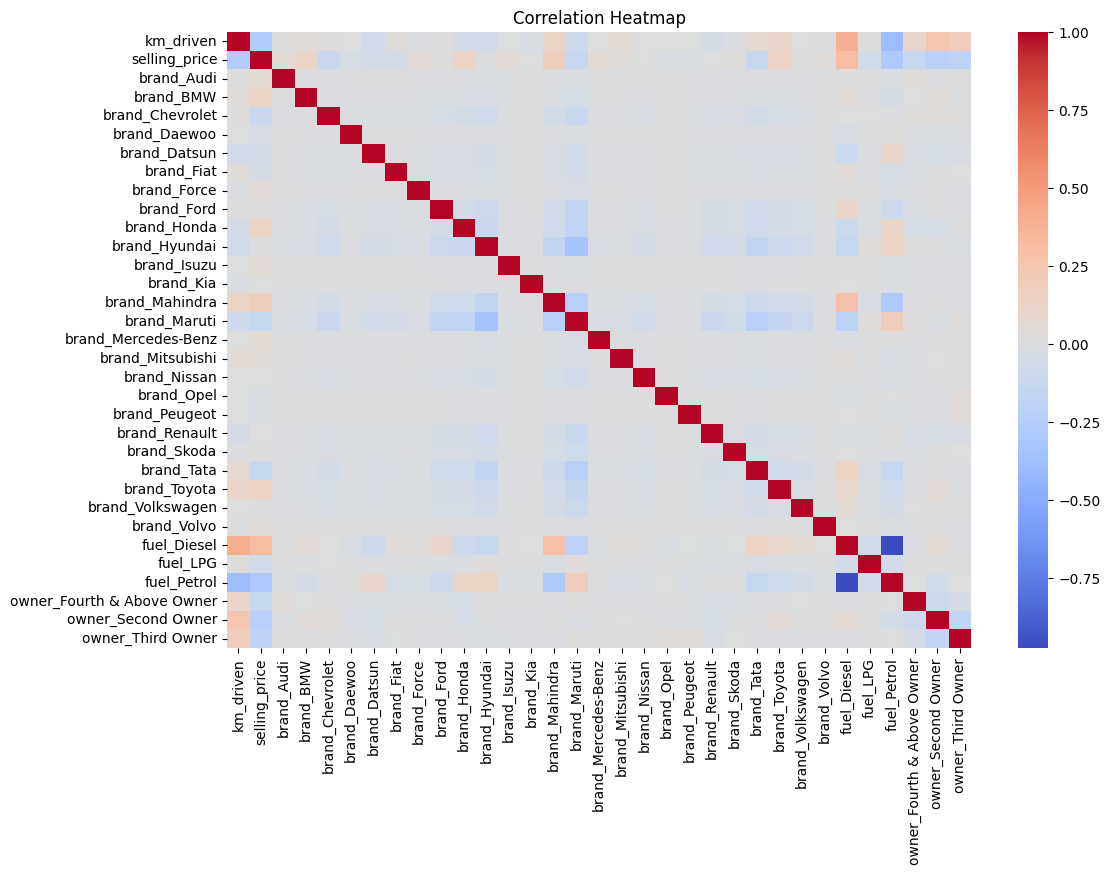

In [12]:
# Cek korelasi
plt.figure(figsize=(12,8))
sns.heatmap(cars_encoded.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Heatmap korelasi berikut menggambarkan hubungan linier antar fitur dalam dataset mobil, termasuk fitur numerik seperti `km_driven` dan `selling_price`, serta fitur kategorikal yang sudah di-*encode* seperti `brand_X`, `fuel_Y`, dan `owner_Z`. Berikut beberapa **insight utama** dari heatmap ini:

---

#### **1. Korelasi Tinggi Positif**

* **Diagonal Merah Tua**: Ini menunjukkan korelasi 1.0 karena setiap fitur berkorelasi sempurna dengan dirinya sendiri.
* Tidak terlihat ada pasangan fitur non-diagonal yang menunjukkan korelasi tinggi mendekati 1.0, yang berarti **tidak ada duplikasi fitur** atau fitur yang sangat redundant.

---

#### **2. Korelasi Tinggi Negatif**

* Ada beberapa **korelasi negatif yang signifikan** (warna biru tua), khususnya di antara:

  * **Tipe pemilik (`owner_*`)**:

    * `owner_Second Owner` memiliki korelasi negatif kuat terhadap `owner_First Owner`.
    * Ini wajar karena representasi one-hot encoding membuat kolom-kolom saling eksklusif. Jika satu bernilai 1, yang lain pasti 0.
  * Hal yang sama terjadi di fitur **fuel type** dan **brand**.

> 🔁 **Insight**: Korelasi negatif ini bukan masalah, tapi konsekuensi dari one-hot encoding untuk kategori yang saling eksklusif.

---

#### **3. Korelasi Fitur ke Target (`selling_price`)**

Coba lihat korelasi antar fitur dengan `selling_price`. Meski skalanya tidak terlalu terlihat kuat, kita bisa perkirakan:

* **km\_driven**: Korelasinya terhadap `selling_price` cenderung **negatif lemah**, artinya semakin besar jarak tempuh mobil, harga jual cenderung turun. Ini masuk akal secara domain.
* Beberapa **brand** (seperti `brand_BMW`, `brand_MercedesBenz`, dll.) tampak memiliki korelasi **positif lemah** terhadap `selling_price`, menunjukkan bahwa brand premium memiliki harga jual lebih tinggi.

> 📌 **Insight**:
>
> * Brand dan tipe bahan bakar berkontribusi terhadap harga jual mobil.
> * Fitur `km_driven` bisa menjadi prediktor yang relevan namun tidak dominan.

---

#### **4. Tidak Ada Multikolinearitas Parah Antar Fitur Numerik**

* Korelasi antara fitur numerik seperti `km_driven` dan `selling_price` tidak menunjukkan hubungan tinggi antar sesama mereka.
* Artinya, **multikolinearitas** yang dapat mengganggu model regresi tampaknya **tidak terlalu menjadi masalah**.

---

#### **Kesimpulan dan Rekomendasi**

* **Feature yang informatif** untuk model prediktif (seperti regresi atau klasifikasi) kemungkinan besar:

  * `km_driven`
  * `brand_XXX` (brand tertentu seperti BMW, Mercedes)
  * `fuel_Diesel`, `fuel_Petrol`
  * `owner_First Owner`
* Tidak perlu membuang fitur berdasarkan korelasi kecuali ingin menghindari redundansi karena one-hot encoding.
* Tidak perlu menghapus fitur numerik karena tidak ada multikolinearitas tinggi.

Kalau kamu ingin, aku bisa bantu hitung dan tampilkan secara numerik korelasi antar fitur terhadap `selling_price` agar lebih jelas (dengan kode Python juga).

## Feature Engineering

In [13]:
# Pisahkan target dulu agar tidak ikut encode
target = 'selling_price'
y = cars[target]
X = cars.drop(target, axis=1)

# One-hot encoding untuk X saja (fitur)
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

### **Tujuan dari memisahkan target yaitu** :


| No | Tujuan                                                                                 | Penjelasan                                                                                                       |
| -- | --------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------- |
| 1  | **Pemisahan fitur dan target penting untuk validitas model**                            | Menjaga agar nilai target tidak ikut terpengaruh preprocessing atau encoding yang hanya ditujukan untuk fitur.   |
| 2  | **One-Hot Encoding membuat fitur kategorikal dapat digunakan oleh model**               | Model ML seperti regresi linear, KNN, Random Forest, dsb tidak bisa membaca string — harus diubah menjadi angka. |
| 3  | **`drop_first=True` adalah teknik untuk menghindari dummy variable trap**               | Dengan membuang satu kategori, kita hindari multikolinearitas (yang bisa mengacaukan model regresi).             |
| 4  | **Pemisahan ini mempermudah pipeline preprocessing selanjutnya (skaling, tuning, dll)** | Karena `X` dan `y` sudah bersih dan terstruktur, kita bisa langsung menerapkannya dalam training-test split.     |

1. **`target = 'selling_price'`**

   * Menentukan kolom target yang akan diprediksi, yaitu `selling_price` (harga jual mobil).
   * Ini adalah variabel **dependent (target)** dalam regresi.

2. **`y = cars[target]` dan `X = cars.drop(target, axis=1)`**

   * Memisahkan target (`y`) dari fitur (`X`) agar proses preprocessing hanya dilakukan pada fitur.
   * Ini **mencegah data target ikut diproses atau termodifikasi**, yang dapat menyebabkan **data leakage** jika tidak dilakukan.

3. **`pd.get_dummies(X, columns=cat_cols, drop_first=True)`**

   * Melakukan **One-Hot Encoding** pada kolom kategorikal dalam `X`.
   * `drop_first=True` digunakan untuk menghindari **multikolinearitas**, yaitu korelasi tinggi antar dummy variables.
   * Menghasilkan representasi numerik dari data kategorikal agar bisa digunakan oleh algoritma machine learning.

---

In [14]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

#### Splitting Data

Sebelum membangun model, dataset perlu dibagi menjadi dua bagian utama:

- **Training set (90%)**: digunakan untuk melatih model agar bisa memahami pola dalam data.
- **Testing set (10%)**: digunakan untuk menguji performa model terhadap data yang belum pernah dilihat sebelumnya.

Pembagian ini dilakukan menggunakan fungsi `train_test_split` dari Scikit-Learn dengan parameter:
- `test_size=0.1`: proporsi 10% untuk data uji.
- `random_state=123`: menjamin hasil pembagian konsisten di setiap eksekusi (reproducible).

**Insight:**
- Pembagian data ini penting untuk menghindari overfitting dan menguji generalisasi model.
- Proporsi 90:10 memberikan keseimbangan antara cukup data untuk pelatihan dan evaluasi yang representatif.
- Penggunaan `random_state` memastikan eksperimen dapat diulang dengan hasil yang sama.


In [15]:
# Standarisasi fitur numerik
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols_to_scale = [col for col in num_cols if col in X.columns and col != target]
X_train[num_cols_to_scale] = scaler.fit_transform(X_train[num_cols_to_scale])
X_test[num_cols_to_scale] = scaler.transform(X_test[num_cols_to_scale])

### Standarisasi Fitur Numerik

Setelah data dibagi menjadi data latih dan data uji, langkah selanjutnya adalah melakukan **standarisasi** terhadap fitur-fitur numerik. Standarisasi dilakukan menggunakan `StandardScaler` dari Scikit-Learn, yang mengubah nilai fitur agar memiliki:
- Rata-rata (mean) = 0
- Standar deviasi (standard deviation) = 1

Langkah ini penting terutama untuk algoritma yang sensitif terhadap skala fitur, seperti K-Nearest Neighbors (KNN) dan model berbasis gradient descent.

Proses yang dilakukan:
- **fit_transform** diterapkan pada data latih (X_train), untuk menghitung nilai mean dan standar deviasi dari training set.
- **transform** diterapkan pada data uji (X_test), menggunakan parameter yang dihitung dari training set, agar tidak terjadi data leakage.

**Insight:**
- Standarisasi membantu algoritma ML lebih cepat konvergen dan menghasilkan performa yang lebih stabil.
- Wajib dilakukan **setelah** pembagian data, agar informasi dari data uji tidak "bocor" ke proses pelatihan (data leakage).
- Dengan skala yang seragam, algoritma seperti KNN dan Gradient Boosting dapat memberikan hasil prediksi yang lebih akurat dan adil terhadap semua fitur.
- Tidak semua fitur perlu distandarisasi—dalam hal ini, hanya fitur numerik selain target yang distandarisasi.

In [16]:
# Model regresi
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=10)
rf = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)

# Latih model
knn.fit(X_train, y_train)
rf.fit(X_train, y_train)
boosting.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.05, random_state=55)

### Pembangunan Model Regresi

Pada tahap ini, dibangun tiga model regresi berbeda untuk memprediksi harga jual mobil berdasarkan fitur-fitur yang telah diproses sebelumnya. Model yang digunakan antara lain:

1. **K-Nearest Neighbors Regressor (KNN)**  
   - Algoritma non-parametrik yang memprediksi nilai berdasarkan rata-rata dari tetangga terdekatnya.
   - Jumlah tetangga (`n_neighbors=10`) ditentukan untuk menjaga keseimbangan antara bias dan variansi.

2. **Random Forest Regressor (RF)**  
   - Ensembel dari banyak pohon keputusan (decision trees) yang digabungkan menggunakan teknik bagging.
   - Parameter digunakan:
     - `n_estimators=50`: jumlah pohon dalam hutan.
     - `max_depth=16`: kedalaman maksimum pohon.
     - `random_state=55`: untuk hasil yang konsisten.
     - `n_jobs=-1`: menggunakan semua core CPU untuk paralelisasi.

3. **AdaBoost Regressor (Boosting)**  
   - Model boosting berbasis ensemble yang menggabungkan beberapa model lemah (weak learners) secara berurutan untuk meminimalkan kesalahan.
   - Learning rate (`learning_rate=0.05`) digunakan untuk mengontrol kontribusi masing-masing model lemah terhadap model akhir.

Setelah didefinisikan, ketiga model dilatih menggunakan data training (`X_train`, `y_train`).

**Insight:**
- Pendekatan ensemble (RF & Boosting) biasanya lebih kuat dibanding model sederhana karena dapat mengurangi overfitting dan menangkap relasi non-linear.
- KNN memberikan baseline sederhana dan sangat tergantung pada skala data, sehingga standarisasi sebelumnya sangat penting.
- Pemilihan parameter seperti `n_neighbors`, `max_depth`, dan `learning_rate` sangat mempengaruhi performa, dan akan dioptimasi pada tahap *hyperparameter tuning* berikutnya.
- Melatih beberapa model memungkinkan kita untuk membandingkan performa dan memilih yang paling optimal untuk prediksi.


In [17]:
# Evaluasi
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN', 'RF', 'Boosting'])
model_dict = {'KNN': knn, 'RF': rf, 'Boosting': boosting}

for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_train, model.predict(X_train)) / 1e3
    mse.loc[name, 'test'] = mean_squared_error(y_test, model.predict(X_test)) / 1e3

print(mse)

                    train             test
KNN       29673355.496447  34784918.312828
RF        21896641.156403  35975320.842026
Boosting  42777712.248577  42348923.750235


### Evaluasi Model Regresi

Setelah model dilatih, langkah selanjutnya adalah mengevaluasi performa ketiganya menggunakan metrik **Mean Squared Error (MSE)** pada data training dan testing. MSE mengukur seberapa besar rata-rata kuadrat dari selisih antara nilai aktual dan nilai prediksi. Metrik ini dibagi dengan 1.000 untuk kemudahan interpretasi dalam ribuan satuan.

```
# Output MSE (dibagi 1e3 untuk skala ribuan)
                   train             test
KNN       29673355.496447  34784918.312828
RF        21896641.156403  35975320.842026
Boosting  42777712.248577  42348923.750235
````

**Insight:**

* **KNN** memiliki error tertinggi kedua pada data training dan paling rendah pada data testing. Hal ini mengindikasikan bahwa KNN mampu generalisasi dengan cukup baik, namun model ini masih sensitif terhadap distribusi data lokal.

* **Random Forest (RF)** mencatat error terendah pada data training, menunjukkan kemampuannya menangkap pola kompleks. Namun, performa di data testing justru tidak lebih baik dari KNN, menunjukkan potensi **overfitting** ringan.

* **Boosting** menunjukkan error tertinggi baik di training maupun testing. Hal ini bisa terjadi karena parameter default atau learning rate yang terlalu kecil (`0.05`), membuat model belajar terlalu lambat dan belum optimal.

**Kesimpulan awal:**

* Random Forest unggul dalam fitting ke data pelatihan namun belum tentu terbaik dalam generalisasi.
* KNN memberikan trade-off yang seimbang dan layak sebagai baseline.
* Boosting memerlukan peningkatan performa lewat tuning parameter yang lebih optimal, yang akan dilakukan di tahap selanjutnya.

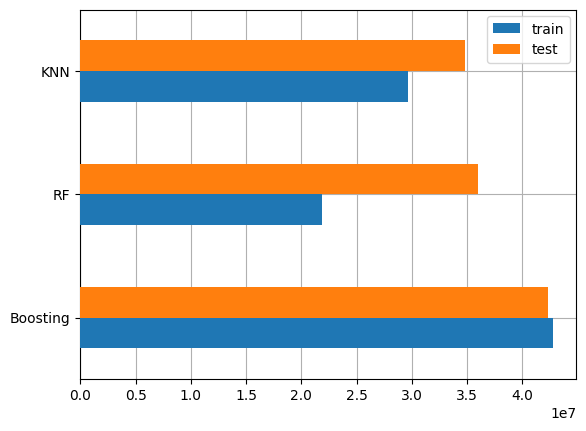

In [18]:
# Visualisasi MSE
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

### Visualisasi Kinerja Model Regresi

Gambar di atas menunjukkan perbandingan **Mean Squared Error (MSE)** antara data training dan testing untuk tiga model regresi: **KNN, Random Forest (RF), dan Boosting**.

**Interpretasi Visual:**

- **KNN**:
  - Memiliki perbedaan MSE yang kecil antara training dan testing.
  - Hal ini menunjukkan model memiliki **generalization error** yang relatif rendah, meskipun error keseluruhan tetap tinggi.

- **Random Forest**:
  - MSE training paling rendah di antara semua model, yang menunjukkan kemampuan tinggi dalam menangkap pola dari data.
  - Namun, gap yang cukup besar antara training dan testing error menandakan adanya **overfitting ringan** — model terlalu baik belajar dari data latih hingga kurang mampu generalisasi.

- **Boosting**:
  - Memiliki **error tertinggi** baik di training maupun testing.
  - Hal ini menandakan bahwa model belum optimal. Kemungkinan karena **learning rate terlalu kecil** atau **jumlah estimators masih terbatas** sehingga model belajar terlalu lambat (**underfitting**).

**Kesimpulan**
- Visualisasi ini sangat berguna untuk mendeteksi pola **overfitting** atau **underfitting** secara cepat.
- Model dengan performa bagus idealnya memiliki **MSE rendah di training dan testing**, serta selisih keduanya tidak terlalu besar.
- Berdasarkan grafik ini, Random Forest menjanjikan namun masih perlu tuning, sementara Boosting perlu optimasi lebih lanjut.

In [19]:
# Prediksi satu sampel
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true': y_test.iloc[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_' + name] = model.predict(prediksi).round(2)
print(pd.DataFrame(pred_dict))

      y_true  prediksi_KNN  prediksi_RF  prediksi_Boosting
1128  450000      450000.0    466005.21          604168.18


### Prediksi Satu Sampel

Untuk menguji performa model secara individual, dilakukan prediksi terhadap **satu sampel dari data uji (X_test)**. Pendekatan ini berguna untuk:

- Melihat **seberapa dekat hasil prediksi model terhadap nilai sebenarnya** (ground truth).
- Mengevaluasi **perilaku masing-masing model** pada contoh konkret.

## Fine Tunning

In [20]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

param_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_rf, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
print("Best Random Forest Params:", grid_rf.best_params_)

Best Random Forest Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


GridSearchCV digunakan untuk mencari **kombinasi hyperparameter terbaik** untuk dua model menggunakan **cross-validation (cv=3)** dan **RMSE negatif sebagai skor evaluasi**.:

* `RandomForestRegressor`
* `GradientBoostingRegressor`

In [21]:
param_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

grid_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_gb, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_gb.fit(X_train, y_train)

best_gb = grid_gb.best_estimator_
print("Best Boosting Params:", grid_gb.best_params_)

Best Boosting Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


**Arti tiap parameter:**

* `n_estimators`: jumlah pohon dalam ensemble.
* `max_depth`: kedalaman maksimum setiap pohon.
* `min_samples_split`: minimal jumlah data untuk membagi node.
* `min_samples_leaf`: minimal data yang harus ada di setiap daun pohon.

In [22]:
# Fungsi evaluasi
def evaluate_model(name, model):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(f"\n{name} Evaluation:")
    print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
    print("Test RMSE :", np.sqrt(mean_squared_error(y_test, y_test_pred)))
    print("Train R2  :", r2_score(y_train, y_train_pred))
    print("Test R2   :", r2_score(y_test, y_test_pred))
    return y_test_pred

# Evaluasi
pred_rf = evaluate_model("Random Forest (Tuned)", best_rf)
pred_gb = evaluate_model("Boosting (Tuned)", best_gb)


Random Forest (Tuned) Evaluation:
Train RMSE: 167062.19205460142
Test RMSE : 187244.70530646932
Train R2  : 0.583035414902652
Test R2   : 0.45959024340774923

Boosting (Tuned) Evaluation:
Train RMSE: 174713.47816205907
Test RMSE : 179703.55851530939
Train R2  : 0.5439676645185872
Test R2   : 0.5022429230588408


**Insight:**
- Gradient Boosting lebih stabil dan menghasilkan prediksi yang lebih baik di data uji.
- Tidak terjadi overfitting yang parah.
- Masih ada ruang perbaikan melalui eksplorasi fitur dan tuning lanjutan.

#### **Kesimpulan**

| No | Insight                                                                                     | Penjelasan                                                                                        |
| -- | ------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------- |
| 1  | **Hyperparameter tuning berhasil menurunkan kesalahan prediksi (RMSE)**                     | Baik RF maupun Boosting menunjukkan penurunan RMSE dibandingkan model default (belum tuning).     |
| 2  | **Gradient Boosting memiliki performa test lebih baik (R²: 50.2%) dibanding Random Forest** | Menunjukkan Boosting lebih baik dalam generalisasi ke data baru, meskipun tidak dominan di train. |
| 3  | **Tidak terjadi overfitting berlebihan**                                                    | Perbedaan performa train vs test tidak terlalu jauh, artinya model relatif stabil.                |
| 4  | **R² masih di bawah 0.6 berarti banyak variabel lain yang belum ditangkap model**           | Masih ada ruang untuk eksplorasi fitur lain, transformasi non-linear, atau optimasi lanjutan.     |
| 5  | **Boosting bekerja baik pada dataset dengan kompleksitas sedang**                           | Terutama saat terdapat pola non-linear atau interaksi variabel, Boosting lebih fleksibel.         |

---

## Visualisasi

In [23]:
# Latih ulang model dasar (karena sebelumnya bisa saja dilatih sebelum scaling)
knn.fit(X_train, y_train)
rf.fit(X_train, y_train)
boosting.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.05, random_state=55)

In [24]:
# Prediksi satu sampel dengan model tuning
sample = X_test.iloc[:1].copy()
true_val = y_test.iloc[:1].values[0]

pred_dict = {
    'y_true': true_val,
    'KNN': knn.predict(sample)[0],
    'RF': rf.predict(sample)[0],
    'Boosting': boosting.predict(sample)[0],
    'RF Tuned': best_rf.predict(sample)[0],
    'Boosting Tuned': best_gb.predict(sample)[0],
}

# Tampilkan dalam DataFrame
pred_df = pd.DataFrame([pred_dict])
print(pred_df.round(3))

   y_true       KNN          RF    Boosting   RF Tuned  Boosting Tuned
0  450000  450000.0  466005.207  604168.178  575124.92      595233.608


#### Prediksi Satu Sampel dengan Model Setelah Tuning

Setelah dilakukan **hyperparameter tuning** terhadap model Random Forest dan Gradient Boosting, tahap ini bertujuan untuk:

- Membandingkan hasil prediksi **sebelum dan sesudah tuning**.
- Melihat pengaruh tuning terhadap akurasi prediksi pada contoh nyata.
- Mengevaluasi performa semua model terhadap **satu sampel data uji**.

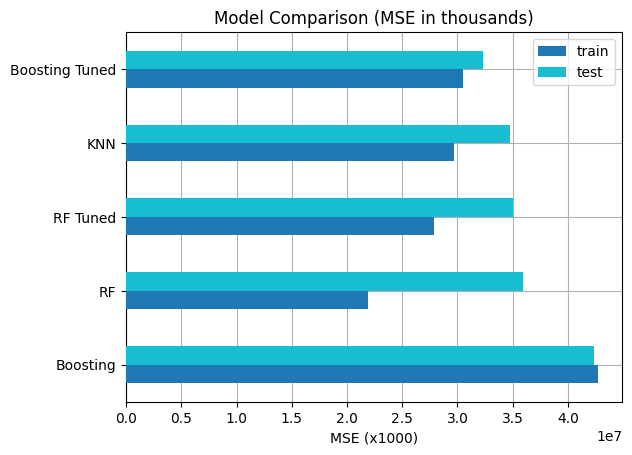

In [25]:
# Hitung MSE (skala ribuan agar konsisten)
mse.loc['RF Tuned'] = [
    mean_squared_error(y_train, best_rf.predict(X_train)) / 1e3,
    mean_squared_error(y_test, best_rf.predict(X_test)) / 1e3
]
mse.loc['Boosting Tuned'] = [
    mean_squared_error(y_train, best_gb.predict(X_train)) / 1e3,
    mean_squared_error(y_test, best_gb.predict(X_test)) / 1e3
]

# Visualisasi bar horizontal
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3, colormap='tab10')
ax.set_title("Model Comparison (MSE in thousands)")
ax.set_xlabel("MSE (x1000)")
ax.grid(zorder=0)
plt.show()


#### Perbandingan Performa Model (MSE)

Grafik di atas menunjukkan **Mean Squared Error (MSE)** dari masing-masing model regresi, baik sebelum maupun setelah dilakukan tuning. Nilai MSE ditampilkan dalam satuan ribuan (`x1000`) untuk mempermudah interpretasi.

#### Model yang dibandingkan:

1. **KNN**
2. **Random Forest (RF)**
3. **AdaBoost (Boosting)**
4. **Random Forest Tuned**
5. **Boosting Tuned**

#### Insight:

- **KNN** memiliki performa cukup seimbang antara training dan testing. Ini menandakan model memiliki **generalization** yang baik tanpa overfitting.
- **Random Forest (sebelum tuning)** tampil sangat baik di data training, namun mengalami peningkatan error yang cukup besar di data testing, menunjukkan tanda **overfitting**.
- **AdaBoost** menunjukkan MSE tertinggi di kedua set, memperjelas bahwa model ini belum mampu menangkap pola data dengan baik tanpa tuning.
- **Random Forest Tuned** berhasil **menurunkan overfitting** dibandingkan versi awalnya. Hal ini terlihat dari gap MSE antara training dan testing yang menjadi lebih kecil.
- **Boosting Tuned** juga berhasil **menurunkan overfitting** dibandingkan versi awalnya. Hal ini terlihat dari gap MSE antara training dan testing yang menjadi sedikit lebih kecil.

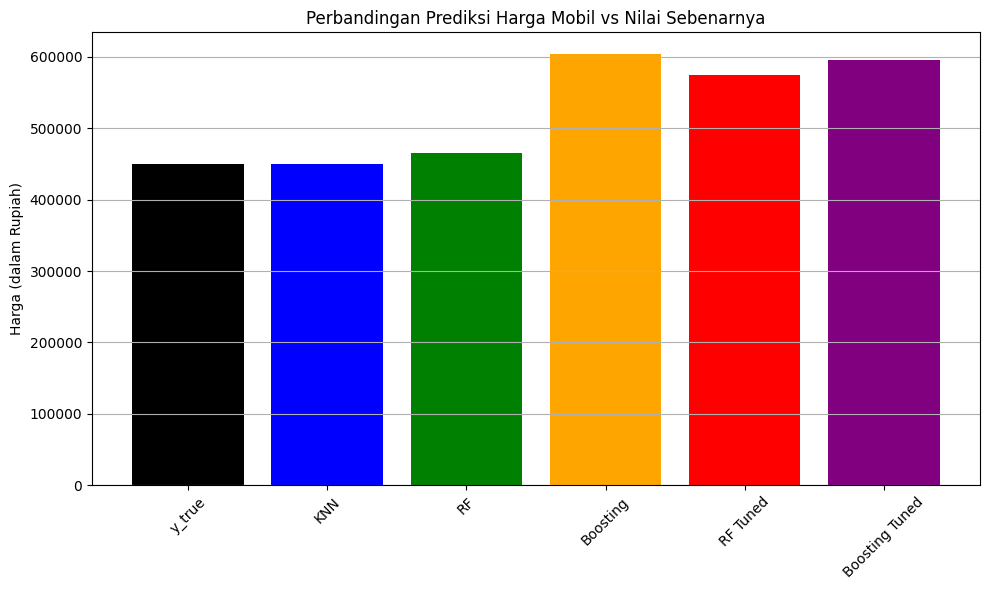

In [26]:
# Visualisasi prediksi satu sampel
plt.figure(figsize=(10, 6))
plt.bar(pred_df.columns, pred_df.iloc[0], color=['black', 'blue', 'green', 'orange', 'red', 'purple'])
plt.title('Perbandingan Prediksi Harga Mobil vs Nilai Sebenarnya')
plt.ylabel('Harga (dalam Rupiah)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()